<a href="https://colab.research.google.com/github/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/blob/main/RSG_TERRa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка английского датасета для сравнения

In [1]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://dl.fbaipublicfiles.com/glue/superglue/data/v2/RTE.zip" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

Archive:  temp.zip
   creating: data/RTE/
  inflating: data/RTE/train.jsonl    
  inflating: data/RTE/test.jsonl     
  inflating: data/RTE/val.jsonl      



     0K .......... .......... .......... .......... ..........  6% 1023K 1s
    50K .......... .......... .......... .......... .......... 13% 5.85M 0s
   100K .......... .......... .......... .......... .......... 20% 3.06M 0s
   150K .......... .......... .......... .......... .......... 27% 25.9M 0s
   200K .......... .......... .......... .......... .......... 34% 2.29M 0s
   250K .......... .......... .......... .......... .......... 40% 32.3M 0s
   300K .......... .......... .......... .......... .......... 47% 31.3M 0s
   350K .......... .......... .......... .......... .......... 54% 17.9M 0s
   400K .......... .......... .......... .......... .......... 61% 48.1M 0s
   450K .......... .......... .......... .......... .......... 68% 2.91M 0s
   500K .......... .......... .......... .......... .......... 75% 62.5M 0s
   550K .......... .......... .......... .......... .......... 81% 57.2M 0s
   600K .......... .......... .......... .......... .......... 88%  240M 0s
   650K ...

# Загрузка русскоязычного датасета

In [2]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://russiansuperglue.com/tasks/download/TERRa" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

Archive:  temp.zip
   creating: data/TERRa/
  inflating: data/TERRa/train.jsonl  
   creating: data/__MACOSX/
   creating: data/__MACOSX/TERRa/
  inflating: data/__MACOSX/TERRa/._train.jsonl  
  inflating: data/TERRa/.DS_Store    
  inflating: data/__MACOSX/TERRa/._.DS_Store  
  inflating: data/TERRa/test.jsonl   
  inflating: data/__MACOSX/TERRa/._test.jsonl  
  inflating: data/TERRa/val.jsonl    
  inflating: data/__MACOSX/TERRa/._val.jsonl  
  inflating: data/__MACOSX/._TERRa   



     0K .......... .......... .......... .......... ..........  5%  272K 3s
    50K .......... .......... .......... .......... .......... 11%  272K 3s
   100K .......... .......... .......... .......... .......... 16% 84.6M 2s
   150K .......... .......... .......... .......... .......... 22%  273K 2s
   200K .......... .......... .......... .......... .......... 28% 84.5M 1s
   250K .......... .......... .......... .......... .......... 33% 72.2M 1s
   300K .......... .......... .......... .......... .......... 39% 88.4M 1s
   350K .......... .......... .......... .......... .......... 45%  275K 1s
   400K .......... .......... .......... .......... .......... 50% 82.6M 1s
   450K .......... .......... .......... .......... .......... 56% 73.2M 1s
   500K .......... .......... .......... .......... .......... 62% 88.5M 0s
   550K .......... .......... .......... .......... .......... 67% 82.2M 0s
   600K .......... .......... .......... .......... .......... 73% 87.1M 0s
   650K ...

Fancy way to display content of the dataset directory

In [3]:
%%bash
# add tree package for fancy directory display
apt-get install tree

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 17 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (63.7 kB/s)
Selecting previously unselected package tree.
(Reading database ... 146425 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [4]:
# display the content of the folder
!tree

.
└── data
    ├── RTE
    │   ├── test.jsonl
    │   ├── train.jsonl
    │   └── val.jsonl
    └── TERRa
        ├── test.jsonl
        ├── train.jsonl
        └── val.jsonl

3 directories, 6 files


# Загрузка в pandas

In [5]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

class JSONL_handler():
    """ opens a jsonl file and turns it into a necessary data structure """
    
    def __init__(self, path):
        self.path = path # path to jsonl file

    def to_pandas(self):
        """ get jsonl file content as a pandas DataFrame"""
        return pd.read_json(path_or_buf=self.path, lines=True)

In [6]:
handler = JSONL_handler('data/TERRa/train.jsonl')
df = handler.to_pandas()

In [7]:
handler_val = JSONL_handler('data/TERRa/val.jsonl')
df1 = handler_val.to_pandas()

In [8]:
handler_en = JSONL_handler('data/RTE/train.jsonl')
df_en = handler_en.to_pandas()

# Общая информация про train

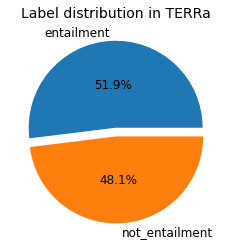

In [10]:
import matplotlib.pyplot as plt
plt.title('Label distribution in TERRa', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12))
plt.show()

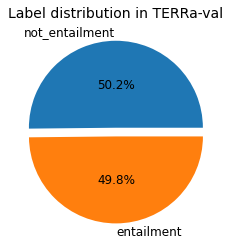

In [ ]:
plt.title('Label distribution in TERRa-val', fontsize=14)
plt.pie(df1['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df1['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12))
plt.show()

In [ ]:
df['label'].value_counts()

entailment        1359
not_entailment    1257
Name: label, dtype: int64

In [ ]:
df_en['label'].value_counts()

entailment        1249
not_entailment    1241
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


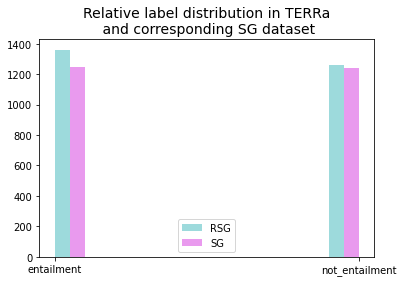

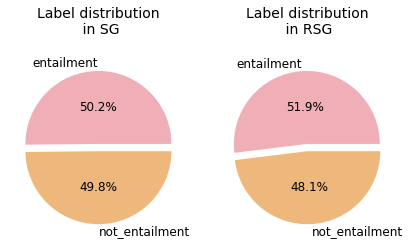

In [ ]:
plt.title('Relative label distribution in TERRa\n and corresponding SG dataset', fontsize=14)
plt.hist(x = [df['label'], df_en['label']], color=["#9ddadc", "#e99aee"], label=['RSG','SG'], rwidth = 50) 
plt.legend(loc='best')
plt.show()
print()

plt.subplot(1,2,1)
colours = {'#9ddca6', '#f0afb6', '#eeb87c'}

plt.title('Label distribution\n in SG\n', fontsize=14)
plt.pie(df_en['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df_en['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.subplot(1,2,2)

plt.title('Label distribution\n in RSG\n', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.tight_layout()
plt.show()

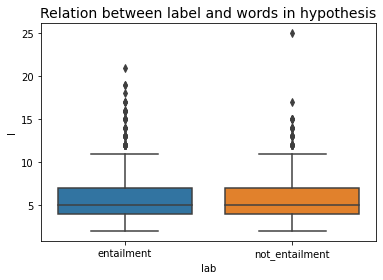

In [ ]:
import seaborn as sns
new_d = pd.DataFrame({'hypothesis': df.hypothesis, 'lab': df.label})
cnt = []
for i in range(len(new_d)):
  cnt.append(len(new_d['hypothesis'][i].split()))
new_d['l'] = cnt
_ = sns.boxplot(x='labels', y= 'l', data=new_d)
_ = plt.title('Relation between label and words in hypothesis', fontsize=14)
plt.show()

In [ ]:
print("entailment hypothesis mean words:", new_d[(new_d['lab']=='entailment')].mean())
print("not entailment hypothesis mean words:", new_d[(new_d['lab']!='entailment')].mean())

entailment hypothesis mean words: l    6.086093
dtype: float64
not entailment hypothesis mean words: l    5.888624
dtype: float64


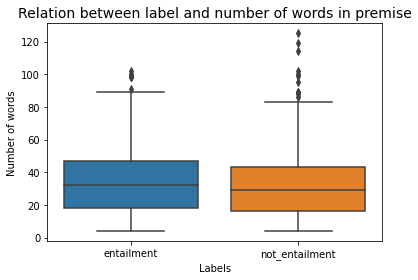

In [26]:
import seaborn as sns
new_p = pd.DataFrame({'premise': df.premise, 'lab': df.label})
cnt = []
for i in range(len(new_p)):
  cnt.append(len(new_p['premise'][i].split()))
new_p['l'] = cnt

_ = sns.boxplot(x='lab', y= 'l', data=new_p)
_ = plt.xlabel("Labels")
_ = plt.ylabel("Number of words")
_ = plt.title('Relation between label and number of words in premise', fontsize=14)
plt.savefig('terra_heuristic')
plt.show()

In [ ]:
print("entailment premise median words:", new_p[(new_p['lab']=='entailment')].median())
print("not entailment premise median words:", new_p[(new_p['lab']!='entailment')].median())

entailment premise median words: l    32.0
dtype: float64
not entailment premise median words: l    29.0
dtype: float64


In [ ]:
df.head()

,premise,hypothesis,label,idx
0,"Женщину доставили в больницу, за ее жизнь сейчас борются врачи.",Женщину спасают врачи.,entailment,0
1,"Он проводит невидимую грань между настоящим и будущим. В эти минуты все мы подводим главные итоги года, вспоминаем самые важные события. В эти мгновения мы с волнением ждем добрых перемен.",В эти минуты все мы подводим друг друга.,not_entailment,1
2,"Мужчина рассказал: детская коляска, принадлежащая его семье, пропала прямо из подъезда. Как выяснили полицейские, коляску украл сосед мужчины. Он был пьян, и ему нужны были деньги.",Сосед часто крадет детские коляски ради денег.,not_entailment,2
3,"Я просто об этом даже не думаю, потому что если кто-то что-то захочет, никуда не спрячешься.",Спрятаться не удастся.,entailment,3
4,"В ходе проверки нашли дома с наледью и сосульками на крышах. Информацию о них передали коммунальщикам. Во избежание несчастных случаев спасатели рекомендуют гражданам быть осторожней, а коммунальщикам – оперативней, при выходе из зданий советуют смотреть на крыши и, по возможности, обходить края зданий.",Все сосульки с крыш были сбиты.,not_entailment,4


# Entailment (ошибки и странности разметки)

In [ ]:
df_true = df[(df['label'] == "entailment")]
df_true.reset_index
df_true.iloc[70:80]

,premise,hypothesis,label,idx
141,"Из них по семи были вынесены обвинительные заключение, а по одному принято решение о мерах медицинского воздействия. Ни по одному из дел не было вынесено оправдательного приговора. Благодаря слаженной работе силовиков не было зарегистрировано ни одной экстремистской акции или провокации, которые могли бы дестабилизировать общественно-политическую ситуацию или сорвать выборные компании.",Работа силовиков была согласованной.,entailment,141
142,"Фотографии процесса демонтажа уже появились в социальных сетях, и, комментируя их, горожане спрашивают: что же будет построено на этом месте?",Предыдущее строение на этом месте демонтируют.,entailment,142
143,"""Эти средства выделены в рамках """"программы экстренного предоставления ликвидности"""" (emergency liquidity assistance, ELA), которая ранее стала спасением для финансовой системы Ирландии и теперь оказалась еще более важной для Греции. Полный контроль над ELA осуществляет европейский Центробанк (ЕЦБ), что дает ему полномочия решать судьбы государств, пишет FT. ЕЦБ очень неохотно предоставляет информацию о средствах, выделенных из ELA, не сообщая, кому и когда выдаются кредиты. """"Вы не станете говорить лишнего в экстренной ситуации, поскольку это может привести к ухудшению ситуации.""",Европейский Центробанк контролирует программу экстренного предоставления ликвидности.,entailment,143
144,"Молодого человека, который явно только-только употребил наркотическое вещество, обнаружили в подъезде одного из домов.","Молодой человек, употребивший наркотик, был обнаружен в подъезде одного из домов.",entailment,144
147,"""""""Если эти документы там есть, то, скорее всего, для передачи в Арбитражый суд Тюменской области эти документы будут изыматься. Либо они, либо копии будут заверяться прямо на месте в офисе"""", - уточнил он. """"Компания злоупотребляет нашими правами, потому что несколько раз пристав выносил постановление, обязывающее компанию предоставить документы, но компания не реагировала на них никаким образом"""".""",Несколько раз пристав обязывал компанию предоставить документы.,entailment,147
154,"Деканат в восторге, студенты в восторге. Но вдруг им сообщили, что это нельзя. Потому что они с охраной не вовремя согласовали.",Охрана была не в восторге.,entailment,154
156,"""В ходе встречи с участниками акции прокурор разъяснил им причины, по которым было отказано в проведении митинга. """"Когда они пришли подавать заявление, то не указали в нем ответственного за порядок, время проведения акции и численность участников, поэтому им было отказано. Никого из пришедших на площадь привлекать к ответственности не будут, так как собрались всего несколько человек, так что можно сказать, что никакой акции протеста и не было"""", - подчеркнул он.""",Прокурор согласился встретиться с участниками.,entailment,156
157,"В одном из СМИ появилась история о восьмилетней школьнице, корторую в мороз 30 января выставил из салона маршрутного автобуса водитель. Причина в том, что у девочки в качестве оплаты был электронный проездной, вот только у водителя не оказалось с собой валидатора. Поскольку наличных денег у малышки не было, ее и попросили покинуть салон.","СМИ рассказывают о школьнице, которую бессердечный водитель выставил из автобуса на мороз.",entailment,157
160,"Пока под документом оставили свои подписи около 200 человек. В комментариях люди выражают свое несогласие с происходящим. - Я подписываю, потому что многие семьи действительно нуждаются в этих выплатах.",Люди подписываются под документом.,entailment,160
161,"""""""Я осознанно шел играть по чужим правилам. Я не считаю их (выборы - ИФ) честными, но принял этот вызов"""", - сказал Прохоров в прямом эфире на Первом канале в воскресенье. Он подчеркнул, что пошел на выборы, потому что посчитал важным довести свои взгляды и консолидировать вместе миллионы образованных и честных людей.""","Прохоров сказал, что не считает выборы честными.",entailment,161


In [ ]:
#ошибки
df.iloc[[91, 102, 108, 123]]

,premise,hypothesis,label,idx
91,"Магазин, который горит, находится вблизи жилого района, жители которого эвакуированы, ни один человек не пострадал. Дым от пожара распространился к морю. Женщина, которая живет рядом с местом пожара, рассказывает, что ее дом, который является украшением города, вероятно, также горит.",Неподалеку от моря горит магазин.,entailment,91
102,"""""""Система аккредитации - это ключевой инструмент допуска на рынок. Мы сейчас готовим закон об аккредитации, который весной хотим внести в Госдуму"""", - сказала она. """"Этот закон очень важен, потому что он будет предусматривать переход на международные стандарты аккредитации"""", - сказала она.""",Она ждет весну.,entailment,102
108,"Как считают силовики, руководитель на протяжении трех месяцев не платил своим сотрудникам зарплату, различные пособия и иные выплаты, которые причитаются гражданам согласно закону.","Силовики предполагают, что сотрудники не получили от руководителя положенных выплат.",entailment,108
123,"У троих участников драки диагностированы различные травмы. Что интересно, в полиции все они заявили, что претензий друг к другу не имеют.",Участники драки остались довольны друг другом.,entailment,123


In [ ]:
#странности
df.iloc[[48, 54, 61, 69, 75, 113]]

,premise,hypothesis,label,idx
48,"Там горожане могут купить хвойные деревья и лапник, пишет пресс-служба администрации.","В пресс-службе администрации планируют, что горожане будут покупать там хвойные деревья и лапник.",entailment,48
54,"""Но в принципе, считаю, нам неизбежно придется когда-то отказываться и от некоторых из проинвестированных проектов. Потому что особенно по высокотехнологичным проектам рано или поздно может возникать очень коварная менеджерская альтернатива. Все понимают, что проект """"не пошел"""", но поскольку в него уже вложены средства, очень страшно назвать кошку - кошкой.""","""От """"мертвого"""" проекта трудно отказаться, когда в него уже вложены деньги.""",entailment,54
61,"В суде установили, что у ООО «Бежицкие маршрутные такси» есть лицензия и два договора с администрацией на перевозку пассажиров по маршруту «улица Молокова – Бордовичский водозабор», - говорится на сайте арбитражного суда Брянской области.",ООО «Бежицкие маршрутные такси» действует в Брянской области.,entailment,61
69,"Свои поступки женщина объяснила тем, что муж бросил бы ее, если бы она родила ему много детей. К 2006 г. в семье уже росли два ребенка. Личность осужденной сохранена в тайне, поскольку разглашение этой информации противоречит немецкой системе правосудия.",Муж не любил много детей.,entailment,69
75,"Ежедневно в плотины поступает всё больше и больше воды, что не может не радовать.","Вчера в плотины поступало не так много воды, как сегодня.",entailment,75
113,"""""""Жизнь"""" дороги зависит от работы тех, кто ее строит.""","""Работа строителей дороги влияет на ее """"жизнь""""..""",entailment,113


# Not entailment

In [ ]:
df_false = df[(df['label'] == "not_entailment")]
df_false.reset_index
df_false.iloc[30:40]

,premise,hypothesis,label,idx
62,"Таким образом, он решил отомстить фермеру, за то, что стал фигурантом уголовного дела, украв у него козу.",На него завели административное дело.,not_entailment,62
67,"Автоматическая тормозная система реагирует соответствующим образом к аварийным ситуациям и управляет даже тормозами. Эта техника спасла жизни многих людей. Если бы системы не было на грузовике, жертв было бы больше.","Благодаря этой системе, обходится без жертв.",not_entailment,67
70,"О случившемся она заявила в полицию. Когда супруг вернулся из командировки и обо всем узнал, то принял решение с женой расстаться. Официально они не развелись, но живут отдельно.",Супруги живут вместе.,not_entailment,70
71,"Новый пассажир оказался участковым уполномоченным. Опытным взглядом полицейский осмотрел соседей по салону и в двух женских лицах уловил знакомые черты. Он видел их раньше — в ориентировке на розыск, женщин подозревали в совершении карманных краж.",Участковый узнал всех в салоне.,not_entailment,71
72,"""Быстро через пустяковый, прореженный собравшимися коридор между полицейским кордоном и многотысячной людской пробкой, заканчивающейся у самой сцены, шел Илья Найшуллер, режиссер и музыкант, лидер группы Biting Elbows. Он, как и большинство встреченных мною, был и на Болотной площади - тогда точно также фотографировал митингующих, а после активно призывал прийти в Facebook - """"всех, кто готов был меня слушать"""". """"Потому что что-то не так, это очевидно"""".""",Илья Найшуллер был и на Красной площади.,not_entailment,72
73,"Пассажиры жалуются на то, что отсутствуют последние рейсы, в салонах грязь и холод, водители курят, не покидая салона, и проезжают мимо остановок, экипажи не помогают инвалидам попасть в салон.",Пассажиры хвалят последние рейсы.,not_entailment,73
78,"182 УК РФ (незаконное использование сведений, составляющих коммерческую тайну, без согласия их владельца лицом, которому она стала известна по работе, совершенное из корыстной заинтересованности). Ровно год - с марта 2015 г. по март 2016 г. обвиняемая, работница банка, имела доступ к полной базе данных лиц, которые когда-либо туда обращались.",Обвиняемая хотела устроиться на работу в банк.,not_entailment,78
79,"После этого Цискаридзе обратился в полицию, которая незамедлительно прибыла на место. В ходе осмотра было установлено, что в отсутствие хозяина в его квартиру никто из посторонних не входил. Эксперты изъяли замки с обеих дверей для исследования, однако точно установить, была ли попытка взлома, скорее всего, не удастся, так как личинка внутренней двери полностью разрушена слесарем.",Квартиру Цискаридзе не пытались взломать.,not_entailment,79
81,"Фотографии процесса демонтажа уже появились в социальных сетях, и, комментируя их, горожане спрашивают: что же будет построено на этом месте?",Горожане игнорируют фото демонтажа в соцсетях.,not_entailment,81
83,"Отдавать их он не спешил. Да и имущества за предпринимателем официально никакого не числится – гол, как сокол, взыскать вроде как нечего. При этом петербуржец является генеральным директором страховой компании и организации, которая занимается добычей и обогащением железных руд.","Предприниматель гол, как сокол.",not_entailment,83


In [ ]:
#ошибки
df.iloc[[47, 83]]

,premise,hypothesis,label,idx
47,"Они поделились опытом работы своих первичных отделений, выказали предложения по усовершенствованию нормативно-правовой базы во всех сферах, задали вопросы руководителям министерств, ведомств, модераторам площадок. Я уверен, что они после съезда обязательно поделятся со своими коллегами своими впечатлениями от услышанного здесь. Сегодня на площадке, где я был - «Качество государства», как раз говорили про те требования, которые касаются совершенствования нашего законодательства на региональном и федеральном уровнях.",Они после съезда обязательно поделятся со своими коллегами своими впечатлениями от услышанного здесь.,not_entailment,47
83,"Отдавать их он не спешил. Да и имущества за предпринимателем официально никакого не числится – гол, как сокол, взыскать вроде как нечего. При этом петербуржец является генеральным директором страховой компании и организации, которая занимается добычей и обогащением железных руд.","Предприниматель гол, как сокол.",not_entailment,83


In [ ]:
#странности
df.iloc[[11, 16, 42]]

,premise,hypothesis,label,idx
11,"27 декабря в полицию обратилась жительница Димитровграда, которая сообщила, что стала жертвой мошенников. Она рассказала полицейским, что ей позвонил якобы сотрудник банка. Он сообщил, что, поскольку женщина является их постоянным клиентом, ей положена компенсация.",Сотрудник банка пообещал женщине компенсацию.,not_entailment,11
16,"""""""Законопроект, безусловно, полезный и крайне своевременный, поскольку блокировать следует не только порнографические сайты, но и ресурсы экстремистской направленности"""".""","Блокировать следует и сайты, и ресурсы.",not_entailment,16
42,"Исследователи отмечают, что такое развитие ситуации может во много раз увеличить в море содержание ртути.",В море будет больше ртути.,not_entailment,42


# Heuristic results

In [ ]:
!wget -q --show-progress "https://raw.githubusercontent.com/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/main/base.py" -O base.py

In [21]:
%%capture
!pip install pymorphy2[fast]  

from base import BaseSolver
import pymorphy2
import re
from pymorphy2 import MorphAnalyzer
import nltk
from functools import lru_cache

m = MorphAnalyzer()

In [ ]:
class TERRaSolver(BaseSolver):
   
    def __init__(self, path: str, path_valid=None):
        super(TERRaSolver, self).__init__(path, path_valid)
   
    def preprocess(self, columns):
      for column in columns:
        self.train[f"{column}_lemmas"] = self.train[column].apply(self.clean_text)
        self.valid[f"{column}_lemmas"] = self.valid[column].apply(self.clean_text)
 
    def words_only(self, text):
      rg = re.compile("[А-Яа-яA-z]+")
      try:
        return rg.findall(text.lower())
      except:
        return []

    @lru_cache(maxsize=128)
    def lemmatize_word(self, token, pymorphy=m):
      return pymorphy.parse(token)[0].normal_form

    def lemmatize_text(self, text):
      return [self.lemmatize_word(w) for w in text]

    def clean_text(self, text):
      tokens = self.words_only(text)
      lemmas = self.lemmatize_text(tokens)  
      return lemmas
    
    def heruistics_all(self, final_desicion=None):
        c = 0
        y_true = self.valid.label
        y_pred = []
        self.preprocess(columns=['premise', "hypothesis"])

        for i, row in self.valid.iterrows():
          
          hyp = row.hypothesis.lower()
          hyp_lem = set(row['hypothesis_lemmas'])
          prem_lem = set(row['premise_lemmas'])
          indic_non_ent = set(['только', 'мужчина'])

          if hyp in row['premise'].lower():
             y_pred.append('entailment')
             c += 1
          elif len(prem_lem & hyp_lem)/len(hyp_lem) <= 1/3 or len(row['premise'].split()) < 29 or len(indic_non_ent & hyp_lem) > 0:
            y_pred.append('not_entailment')
            c += 1
          elif len(prem_lem & hyp_lem)/len(hyp_lem) == 0.75 or len(prem_lem & hyp_lem)/len(hyp_lem) == 1 or len(prem_lem & hyp_lem)/len(hyp_lem) == 2/3:
            y_pred.append('entailment')
            c += 1
          elif len(row['premise'].split()) > 32:
            y_pred.append('entailment')
            c += 1
          else:
            y_pred.append(final_desicion(test_size=1)[0])
        self.show_report(y_true, y_pred)
        print(c, len(self.valid))

In [ ]:
solver = TERRaSolver(path='data/TERRa/train.jsonl',
                     path_valid='data/TERRa/val.jsonl')
solver.heruistics_all(final_desicion=solver.majority_class)

                precision    recall  f1-score   support

    entailment       0.60      0.56      0.58       153
not_entailment       0.59      0.64      0.61       154

      accuracy                           0.60       307
     macro avg       0.60      0.60      0.60       307
  weighted avg       0.60      0.60      0.60       307

297 307


In [ ]:
solver = TERRaSolver(path='data/TERRa/train.jsonl',
                     path_valid='data/TERRa/val.jsonl')
solver.heruistics_all(final_desicion=solver.random_choice)

                precision    recall  f1-score   support

    entailment       0.62      0.55      0.58       153
not_entailment       0.60      0.67      0.63       154

      accuracy                           0.61       307
     macro avg       0.61      0.61      0.61       307
  weighted avg       0.61      0.61      0.61       307

297 307


In [ ]:
solver = TERRaSolver(path='data/TERRa/train.jsonl',
                     path_valid='data/TERRa/val.jsonl')
solver.heruistics_all(final_desicion=solver.random_balanced_choice)

                precision    recall  f1-score   support

    entailment       0.60      0.56      0.58       153
not_entailment       0.59      0.64      0.61       154

      accuracy                           0.60       307
     macro avg       0.60      0.60      0.60       307
  weighted avg       0.60      0.60      0.60       307

296 307


# Step-by-step reproduction with the help of the OG code

In [ ]:
%%bash
wget -q --show-progress "https://russiansuperglue.com/tasks/tf_idf" -O temp.zip
unzip temp.zip -d data
rm temp.zip

Archive:  temp.zip
  inflating: data/tfidf.pkl          



     0K .......... .......... .......... .......... ..........  2%  286K 6s
    50K .......... .......... .......... .......... ..........  5%  284K 6s
   100K .......... .......... .......... .......... ..........  7%  286K 6s
   150K .......... .......... .......... .......... .......... 10% 33.3M 4s
   200K .......... .......... .......... .......... .......... 13% 67.5M 3s
   250K .......... .......... .......... .......... .......... 15% 87.3M 3s
   300K .......... .......... .......... .......... .......... 18%  289K 3s
   350K .......... .......... .......... .......... .......... 21% 42.2M 3s
   400K .......... .......... .......... .......... .......... 23% 52.9M 2s
   450K .......... .......... .......... .......... .......... 26%  143M 2s
   500K .......... .......... .......... .......... .......... 29%  193M 2s
   550K .......... .......... .......... .......... .......... 31% 58.5M 2s
   600K .......... .......... .......... .......... .......... 34%  292K 2s
   650K ...

In [ ]:
import codecs
import json
from sklearn.linear_model import LogisticRegression
import pickle
import joblib

vect = joblib.load("data/tfidf.pkl")

def build_feature_TERRa(row):
    premise = str(row["premise"]).strip()
    hypothesis = row["hypothesis"]
    label = row.get("label")
    res = f"{premise} {hypothesis}"
    return res, label


def build_features_TERRa(path, vect):
    with codecs.open(path, encoding='utf-8-sig') as reader:
        lines = reader.read().split("\n")
        lines = list(map(json.loads, filter(None, lines)))
    res = list(map(build_feature_TERRa, lines))
    texts = list(map(lambda x: x[0], res))
    labels = list(map(lambda x: x[1], res))
    ids = [x["idx"] for x in lines]
    return (vect.transform(texts), labels), ids


def fit_TERRa(train, labels):
    clf = LogisticRegression()
    return clf.fit(train, labels)


def eval_TERRa(train_path, val_path, test_path, vect):
    train, _ = build_features_TERRa(train_path, vect)
    val, _ = build_features_TERRa(val_path, vect)
    test, ids = build_features_TERRa(test_path, vect)
    clf = fit_TERRa(*train)
    try:
        test_score = clf.score(*test)
    except ValueError:
        test_score = None
    test_pred = clf.predict(test[0])
    return clf, {
        "train": clf.score(*train),
        "val": clf.score(*val),
        "test": test_score,
        "test_pred": [{"idx": idx, "label": str(label)} for idx, label in zip(ids, test_pred)]
    }

In [ ]:
train_path = "data/TERRa/train.jsonl"
val_path = "data/TERRa/val.jsonl"
test_path = "data/TERRa/test.jsonl"

_, TERRa_scores = eval_TERRa(train_path, val_path, test_path, vect)

In [ ]:
TERRa_scores["train"], TERRa_scores["val"]

(0.7152140672782875, 0.46579804560260585)

In [ ]:
train, _ = build_features_TERRa(train_path, vect)
val, _ = build_features_TERRa(val_path, vect)

In [ ]:
clf = fit_TERRa(*train)
y_din = clf.predict(val[0])
print("Accuracy: {}".format(clf.score(*val)))
print(classification_report(val[1], y_din))

Accuracy: 0.46579804560260585
                precision    recall  f1-score   support

    entailment       0.47      0.50      0.48       153
not_entailment       0.46      0.43      0.45       154

      accuracy                           0.47       307
     macro avg       0.47      0.47      0.47       307
  weighted avg       0.47      0.47      0.47       307



# Feature analysis + Reproduction

In [ ]:
%%capture
!pip install eli5
import numpy as np
import eli5
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

Объединим столбцы с контекстом и гипотезой, как и в базовом решении

In [ ]:
data = pd.DataFrame({'hypothesis': df.hypothesis, 'premise': df.premise, 'label': df.label})
data_val = pd.DataFrame({'hypothesis': df1.hypothesis, 'premise': df1.premise, 'label': df1.label})

data['meta'] = df.premise + ' ' + df.hypothesis 
data_val['meta'] = df1.premise + ' ' + df1.hypothesis 

Pipeline с базовыми параметрами только на данных гипотезы + логистическая регрессия

(тренировочные данные)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

steps = [('tfidf', TfidfVectorizer(analyzer='word', max_features=10000)),
         ('logreg', LogisticRegression())]

X_train, X_test, y_train, y_test = train_test_split(data.hypothesis, data.label, test_size = 0.2, random_state=42)

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 0.48282442748091603
                precision    recall  f1-score   support

    entailment       0.50      0.57      0.54       274
not_entailment       0.45      0.39      0.42       250

      accuracy                           0.48       524
     macro avg       0.48      0.48      0.48       524
  weighted avg       0.48      0.48      0.48       524



Только гипотеза (валидационные)

In [ ]:
pipeline.fit(data.hypothesis, data.label)
y_din = pipeline.predict(data_val.hypothesis)
print("Accuracy: {}".format(pipeline.score(data_val.hypothesis, data_val.label)))
print(classification_report(data_val.label, y_din))

Accuracy: 0.4560260586319218
                precision    recall  f1-score   support

    entailment       0.46      0.50      0.48       153
not_entailment       0.45      0.42      0.43       154

      accuracy                           0.46       307
     macro avg       0.46      0.46      0.46       307
  weighted avg       0.46      0.46      0.46       307



Тот же pipeline, но на всех данных. Результаты несколько хуже, чем у создателей (0.47 - accuracy, 0.47 - f1)

In [ ]:
pipeline.fit(data.meta, data.label)
y_din = pipeline.predict(data_val.meta)
print("Accuracy: {}".format(pipeline.score(data_val.meta, data_val.label)))
print(classification_report(data_val.label, y_din))

Accuracy: 0.43322475570032576
                precision    recall  f1-score   support

    entailment       0.44      0.53      0.48       153
not_entailment       0.42      0.34      0.37       154

      accuracy                           0.43       307
     macro avg       0.43      0.43      0.43       307
  weighted avg       0.43      0.43      0.43       307



Fine-tuning

In [ ]:
# analyzer='char_wb', ngram_range = (2, 4)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

steps = [('countvect', CountVectorizer(min_df=15, max_df=0.4, lowercase=True, analyzer ='char_wb', decode_error = 'ignore', ngram_range = (2, 4))),
         ('sgd', SGDClassifier(loss="log", n_jobs=-1, class_weight='balanced', random_state=42))]

parameters = {'sgd__alpha': np.arange(0.00000001, 1)}

X_train = data.hypothesis
X_test = data_val.hypothesis
y_train = data.label
y_test = data_val.label

pipeline = Pipeline(steps)

search = GridSearchCV(pipeline, cv=5, param_grid = parameters, scoring = 'accuracy')

search.fit(X_train, y_train)
y_pred = search.predict(X_test)

print("Accuracy: {}".format(search.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(search.best_params_))

Accuracy: 0.5504885993485342
                precision    recall  f1-score   support

    entailment       0.55      0.52      0.53       153
not_entailment       0.55      0.58      0.57       154

      accuracy                           0.55       307
     macro avg       0.55      0.55      0.55       307
  weighted avg       0.55      0.55      0.55       307

Tuned Model Parameters: {'sgd__alpha': 1e-08}


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

steps = [('tfidf', TfidfVectorizer(analyzer ='word',
                                   ngram_range = (1, 4), max_features = 1000)),
         ('logreg', LogisticRegression(class_weight='balanced', random_state=42))]

parameters = {'logreg__C': np.arange(0.00000001, 1)}

X_train = data.meta
X_test = data_val.meta
y_train = data.label
y_test = data_val.label

pipeline = Pipeline(steps)

search = GridSearchCV(pipeline, cv=5, param_grid = parameters, scoring = 'accuracy')

search.fit(X_train, y_train)
y_pred = search.predict(X_test)

print("Accuracy: {}".format(search.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(search.best_params_))

Accuracy: 0.498371335504886
                precision    recall  f1-score   support

    entailment       0.50      0.72      0.59       153
not_entailment       0.50      0.28      0.36       154

      accuracy                           0.50       307
     macro avg       0.50      0.50      0.47       307
  weighted avg       0.50      0.50      0.47       307

Tuned Model Parameters: {'logreg__C': 1e-08}


# Frequency experiments

In [ ]:
%%capture
!pip install pymorphy2[fast] 

In [ ]:
import pymorphy2
import re
from pymorphy2 import MorphAnalyzer
from functools import lru_cache
import nltk
m = MorphAnalyzer()
from collections import Counter

rg = re.compile("[А-Яа-яA-z]+")

def words_only(text, rg=rg):
    try:
        return rg.findall(text.lower())
    except:
        return []

@lru_cache(maxsize=128)
def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]

def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)  
    return lemmas

def freq_dist(frame):
  words = frame.values.tolist()
  flatList = [item for elem in words for item in elem]
  freq = Counter()
  for x in flatList:
    freq.update(x)
  return freq

In [ ]:
new_words = []
for i in range(len(df.hypothesis)):
    new_words.append(clean_text(df.hypothesis[i]))

In [ ]:
df_freq = pd.DataFrame({'new': new_words, 'label': df.label})
df_freq_ent = df_freq[(df_freq['label']== 'entailment')].drop('label', axis = 1)
df_freq_cont = df_freq[(df_freq['label']== 'not_entailment')].drop('label', axis = 1)

In [ ]:
ent_count = freq_dist(df_freq_ent)
non_ent_count = freq_dist(df_freq_cont)

a = set(freq_dist(df_freq_ent).keys())
b = set(freq_dist(df_freq_cont).keys())

In [ ]:
left = []
right = []
non_ent = {}
for x in (b-a):
  non_ent[x] = non_ent_count[x]
for w in sorted(non_ent, key=non_ent.get, reverse=True):
  left.append(w)
  right.append(non_ent[w])

n_e = pd.DataFrame({'word': left, 'right': right})

In [ ]:
n_e.head(20)

,word,right
0,несомненно,8
1,всегда,8
2,играть,6
3,простой,6
4,где,5
5,именно,5
6,скорый,5
7,час,5
8,обязательно,5
9,мобильный,4


In [ ]:
left = []
right = []
ent = {}
for x in (a-b):
  ent[x] = ent_count[x]
for w in sorted(ent, key=ent.get, reverse=True):
  left.append(w)
  right.append(ent[w])

e = pd.DataFrame({'word': left, 'right': right})

In [ ]:
e.head(20)

,word,right
0,трудно,5
1,сложный,5
2,вуз,5
3,станция,5
4,заключение,4
5,спортивный,4
6,количество,4
7,срок,4
8,строение,4
9,верить,4


In [ ]:
word = []
count_plus = []
count_minus = []
for x in (a&b):
  if ent_count[x] < non_ent_count[x] and (non_ent_count[x]-ent_count[x]) > 10:
    word.append(x)
    count_plus.append(ent_count[x])
    count_minus.append(non_ent_count[x])

n_e_union = pd.DataFrame({'word': word, 'ent': count_plus, 'non_ent': count_minus})

In [ ]:
n_e_union['std'] = n_e_union.non_ent - n_e_union.ent
n = n_e_union.sort_values(by=['std'], ascending=False)
n.head(10)

,word,ent,non_ent,std
2,только,5,28,23
3,мужчина,52,75,23
0,всё,18,32,14
1,весь,17,30,13
4,новый,14,26,12
